In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# Step 1: Load Data
data_path = '/content/Case_Study_Data_Slave.xlsx'
df = pd.read_excel(data_path)

In [4]:
# Step 2: Data Exploration and Preprocessing
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   C_ID                       2393 non-null   object        
 1   REG_Date                   2393 non-null   datetime64[ns]
 2   FTD_Date                   2393 non-null   datetime64[ns]
 3   Last_Login_Through         2393 non-null   object        
 4   Age                        2393 non-null   int64         
 5   Gender                     2393 non-null   object        
 6   Phone_Verified             2393 non-null   object        
 7   Email_Verified             2393 non-null   object        
 8   KYC                        2393 non-null   object        
 9   FTD_Device                 2393 non-null   object        
 10  FTD_Amount                 2393 non-null   int64         
 11  REG_Refer_Type             2393 non-null   object        
 12  REG_De

In [5]:
print(df.head())

              C_ID            REG_Date            FTD_Date Last_Login_Through  \
0  CIDNOV210000035 2021-11-01 01:36:30 2021-11-01 01:42:26             MOBILE   
1  CIDNOV210000180 2021-11-01 11:23:30 2021-11-01 11:26:49             MOBILE   
2  CIDNOV210000200 2021-11-01 11:50:10 2021-11-05 12:35:06             MOBILE   
3  CIDNOV210000204 2021-11-01 11:53:49 2021-11-03 09:41:14             MOBILE   
4  CIDNOV210000256 2021-11-01 13:44:04 2021-11-20 12:50:02             MOBILE   

   Age Gender Phone_Verified Email_Verified       KYC FTD_Device  ...  \
0   21      M              Y              Y   PENDING     MOBILE  ...   
1   31      M              Y              Y  VERIFIED     MOBILE  ...   
2   36      M              Y              N   PENDING     MOBILE  ...   
3   25      M              Y              Y   PENDING     MOBILE  ...   
4   26      M              Y              N   PENDING     MOBILE  ...   

   Days_Count_201_POOL Days_Count_Best of 2_POOL Days_Count_Best of 3_POOL

In [6]:
print(df.describe())

                            REG_Date                       FTD_Date  \
count                           2393                           2393   
mean   2021-12-17 19:40:52.738821632  2021-12-20 23:05:19.190137856   
min              2021-11-01 01:36:30            2021-11-01 01:42:26   
25%              2021-11-26 20:24:47            2021-11-30 17:12:43   
50%              2021-12-16 15:30:51            2021-12-20 23:41:12   
75%              2022-01-07 14:32:31            2022-01-10 17:29:55   
max              2022-01-31 23:21:15            2022-02-03 14:12:58   
std                              NaN                            NaN   

               Age    FTD_Amount  Total_Deposit   Total_Wager  Total_Winning  \
count  2393.000000   2393.000000    2393.000000  2.393000e+03   2.393000e+03   
mean     28.305474   1041.970330    7305.253239  1.727602e+04   1.586170e+04   
min       0.000000     25.000000      25.000000  0.000000e+00   0.000000e+00   
25%      23.000000     26.000000      50

In [ ]:
# Check for missing values
print(df.isnull().sum())

C_ID                          0
REG_Date                      0
FTD_Date                  98997
Last_Login_Through            0
Age                       99622
                          ...  
Days_Count_Point_POINT        0
Days_Count_TOURNAMENT         0
Total_Wager.1                 0
Total_Game_Count              0
Total_Days_Count              0
Length: 61, dtype: int64


In [7]:
df.shape

(2393, 61)

In [8]:
df.columns

Index(['C_ID', 'REG_Date', 'FTD_Date', 'Last_Login_Through', 'Age', 'Gender',
       'Phone_Verified', 'Email_Verified', 'KYC', 'FTD_Device', 'FTD_Amount',
       'REG_Refer_Type', 'REG_Device', 'REG_Widget', 'Login_Device',
       'App_Type', 'App_Version', 'Total_Deposit', 'Total_Wager',
       'Total_Winning', 'Total_Withdrawal', 'Total_Bonus',
       'Last_Deposit_Amount', 'Last_Wager_Amount', 'Last_Winning_Amount',
       'Last_Withdrawal_Amount', 'Last_Bonus_Amount', 'Last_Activity_Date',
       'Last_Deposit_Date', 'Last_Wager_Date', 'Free_Game_Cnt_Till',
       'Deposit_DONE', 'Deposit_FAILED', 'Deposit_INITIATED', 'Wager_101_POOL',
       'Wager_201_POOL', 'Wager_Best of 2_POOL', 'Wager_Best of 3_POOL',
       'Wager_Best of 6_POOL', 'Wager_Joker_POINT', 'Wager_Point_POINT',
       'Wager_TOURNAMENT', 'Game_Count_101_POOL', 'Game_Count_201_POOL',
       'Game_Count_Best of 2_POOL', 'Game_Count_Best of 3_POOL',
       'Game_Count_Best of 6_POOL', 'Game_Count_Joker_POINT',
     

In [9]:
df.isnull().sum() / df.shape[0] * 100

,0
C_ID,0.0
REG_Date,0.0
FTD_Date,0.0
Last_Login_Through,0.0
Age,0.0
...,...
Days_Count_Point_POINT,0.0
Days_Count_TOURNAMENT,0.0
Total_Wager_1,0.0
Total_Game_Count,0.0


In [10]:
df.isnull().sum()

,0
C_ID,0
REG_Date,0
FTD_Date,0
Last_Login_Through,0
Age,0
...,...
Days_Count_Point_POINT,0
Days_Count_TOURNAMENT,0
Total_Wager_1,0
Total_Game_Count,0


In [11]:

# Check for duplicates
print(df.duplicated().sum())

0


In [12]:
# Explore categorical features
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for C_ID:
C_ID
CIDNOV210000035    1
CIDDEC210042327    1
CIDDEC210042379    1
CIDDEC210042407    1
CIDDEC210042461    1
                  ..
CIDDEC210003425    1
CIDDEC210003483    1
CIDDEC210003519    1
CIDDEC210003523    1
CIDJAN220038346    1
Name: count, Length: 2393, dtype: int64

Value counts for Last_Login_Through:
Last_Login_Through
MOBILE        1830
MOBILE_WEB     554
PC               8
TAB              1
Name: count, dtype: int64

Value counts for Gender:
Gender
M    2251
F     142
Name: count, dtype: int64

Value counts for Phone_Verified:
Phone_Verified
Y    2287
N     106
Name: count, dtype: int64

Value counts for Email_Verified:
Email_Verified
Y    1740
N     653
Name: count, dtype: int64

Value counts for KYC:
KYC
VERIFIED    1443
PENDING      927
UPLOADED      12
FAILED        11
Name: count, dtype: int64

Value counts for FTD_Device:
FTD_Device
MOBILE        2256
MOBILE_WEB     127
PC               9
TAB              1
Name: count, dtype: int64

Value c

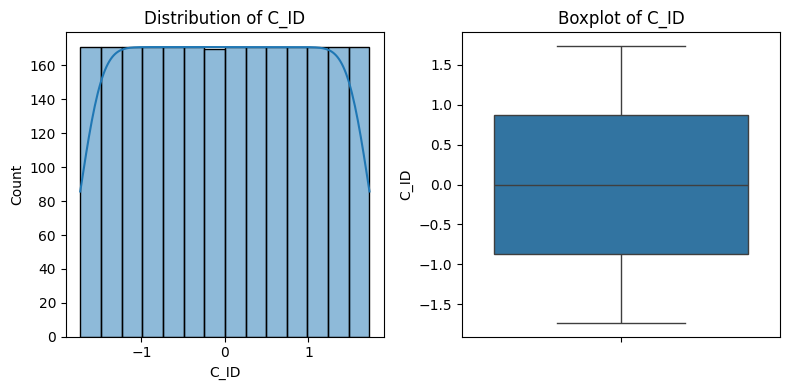

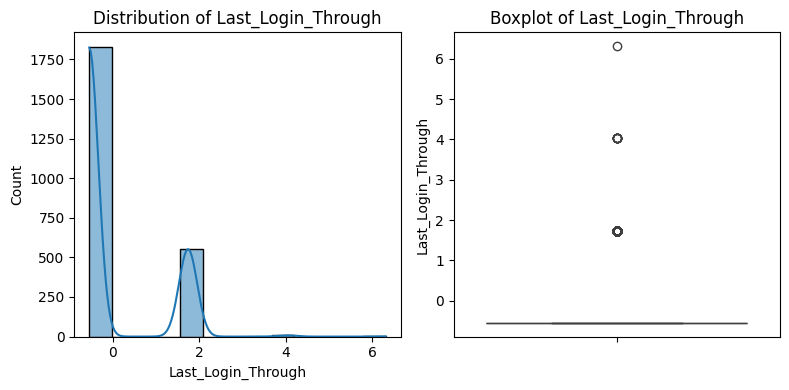

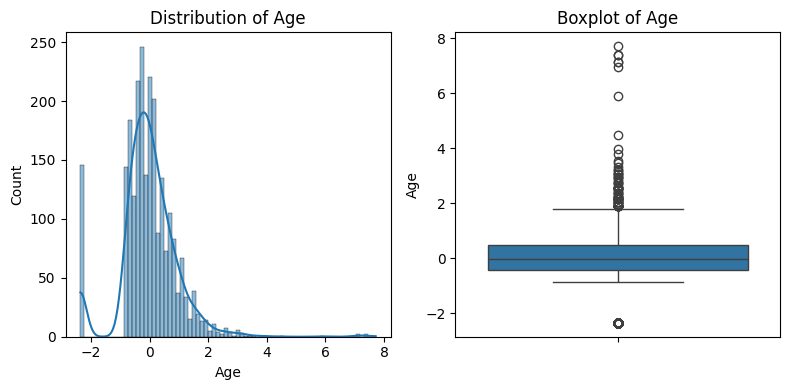

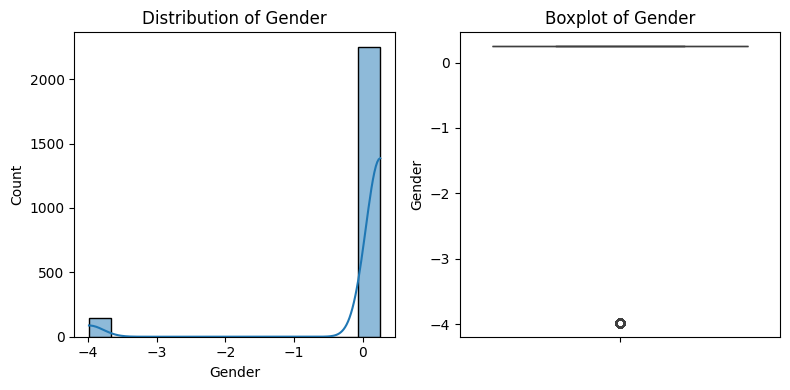

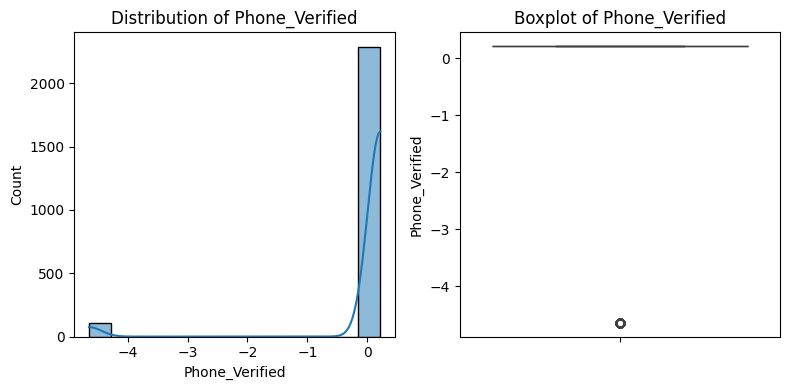

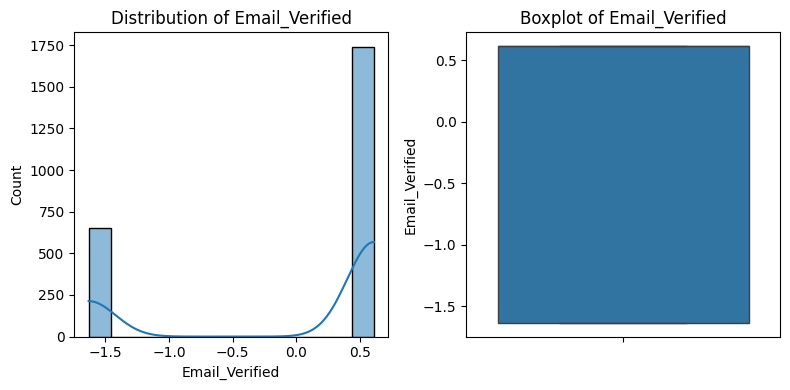

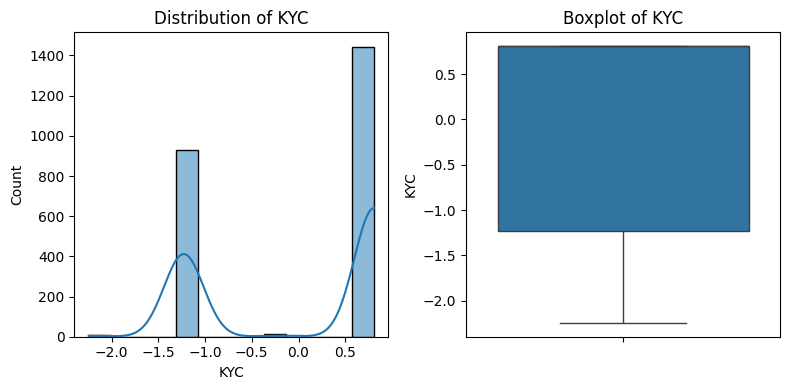

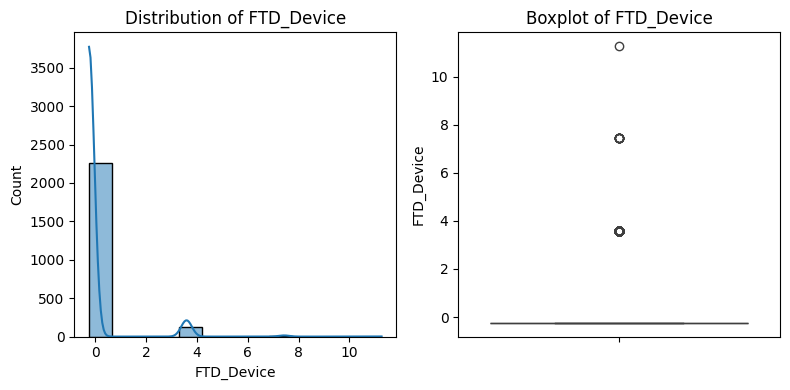

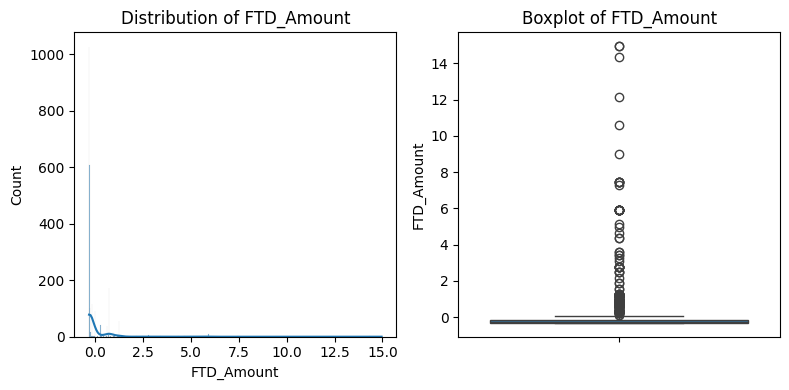

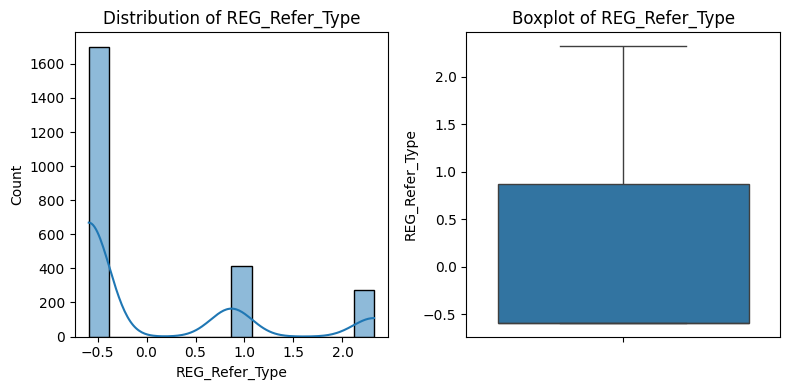

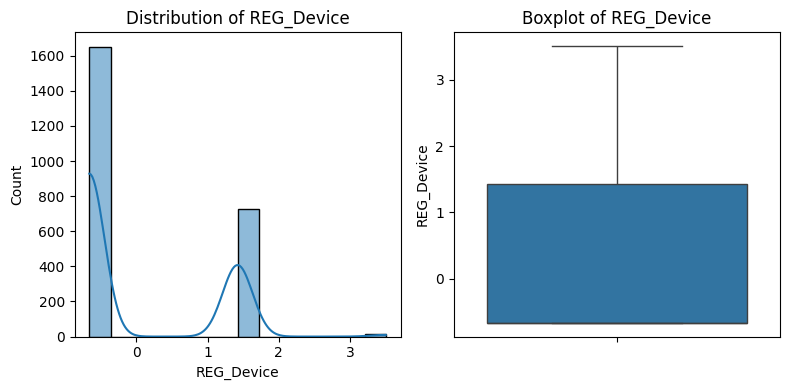

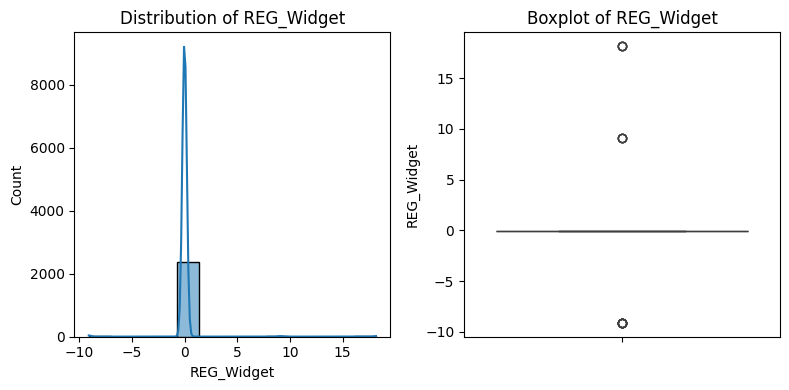

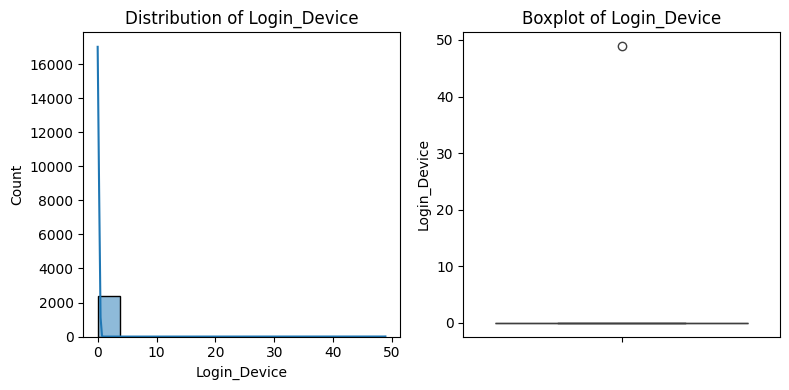

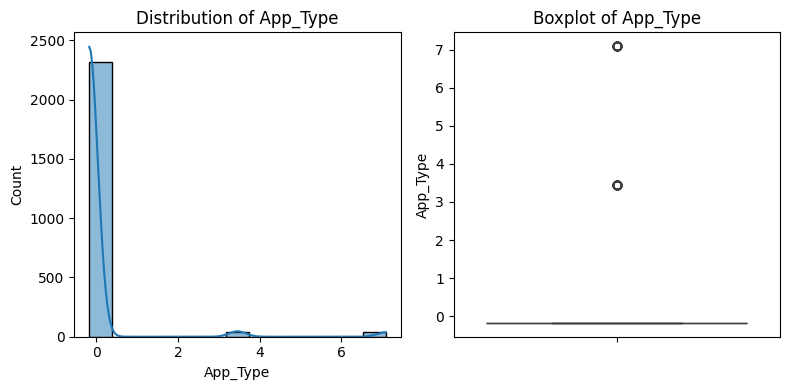

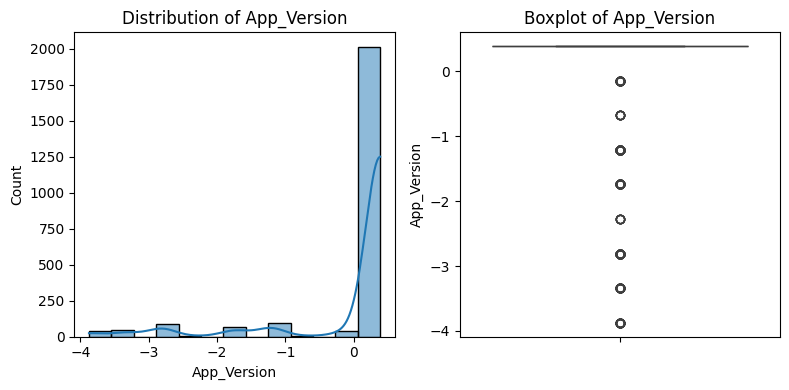

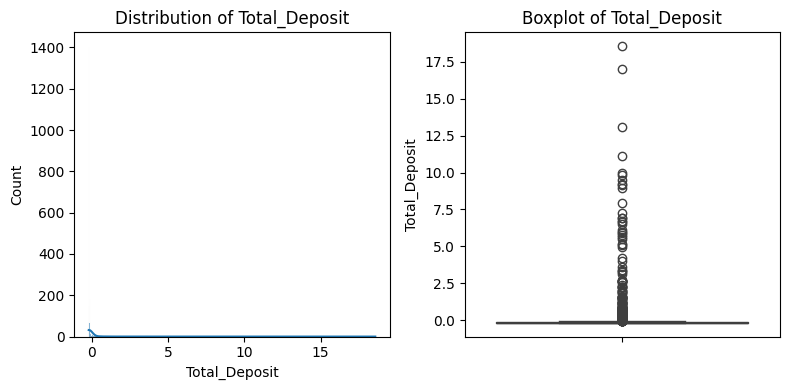

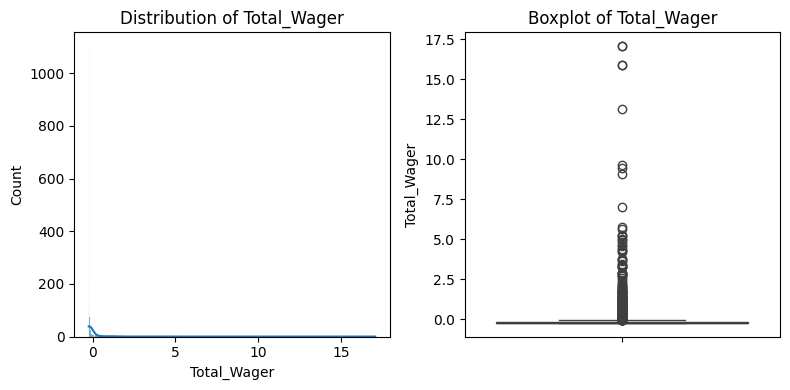

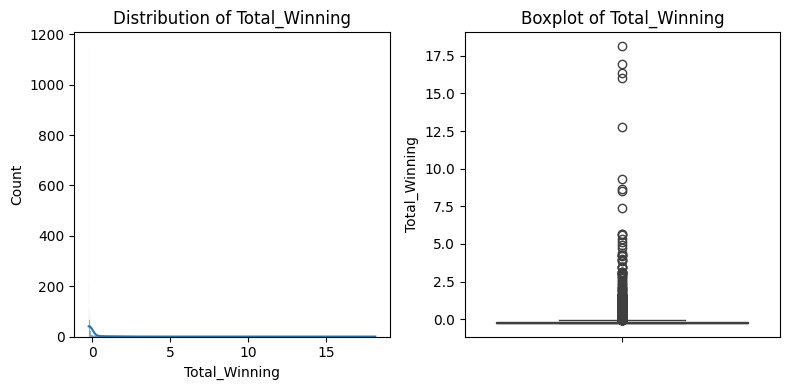

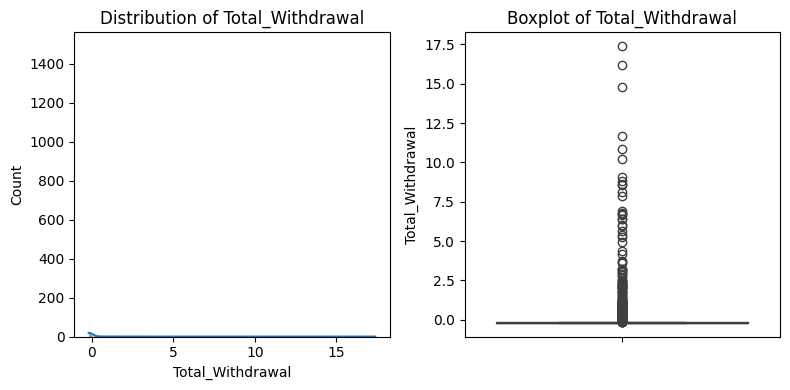

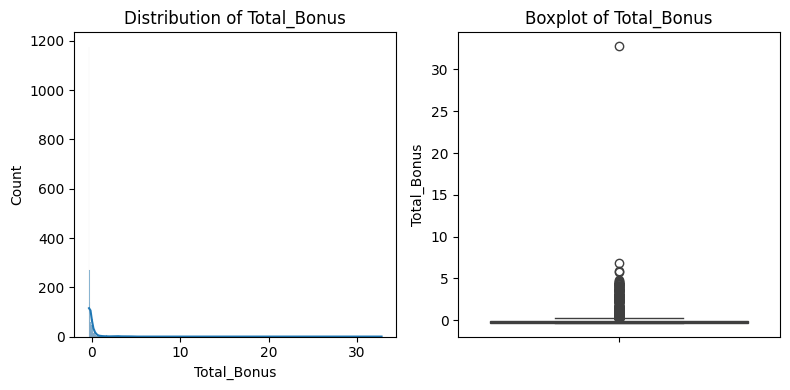

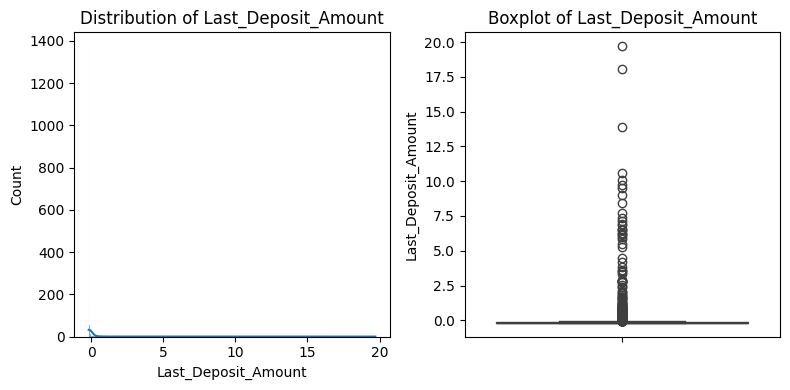

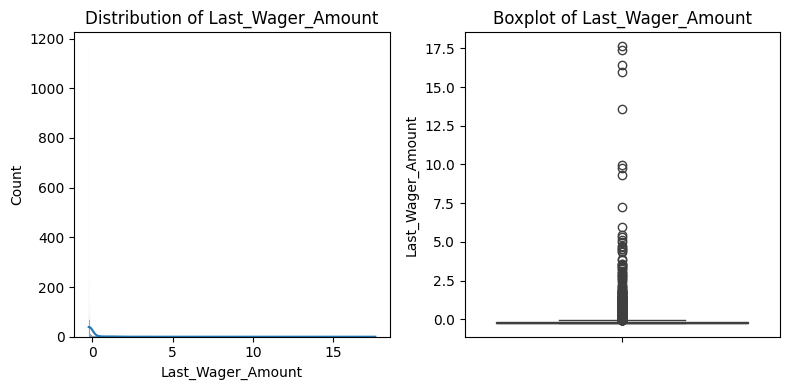

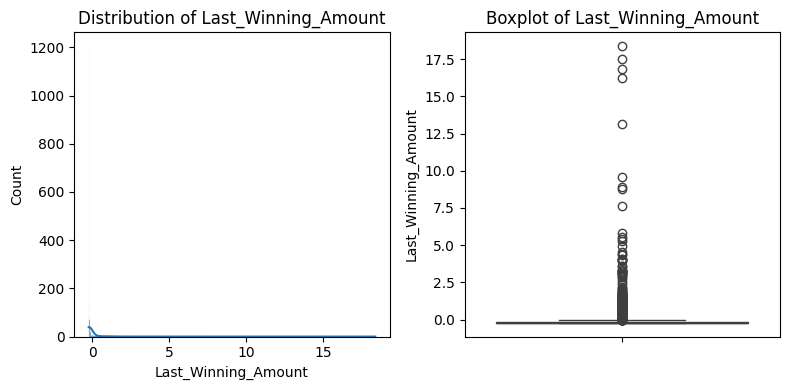

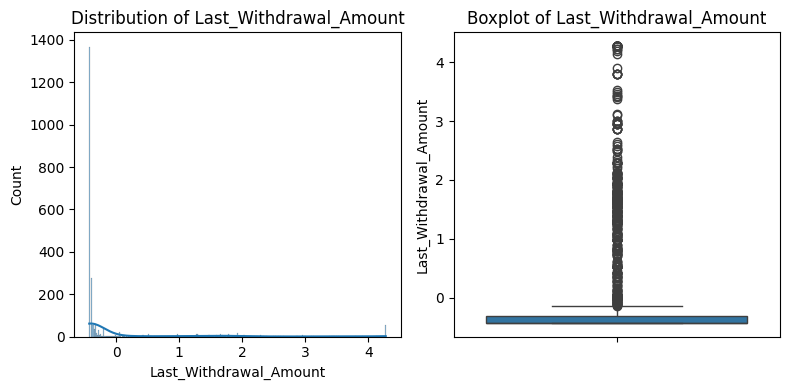

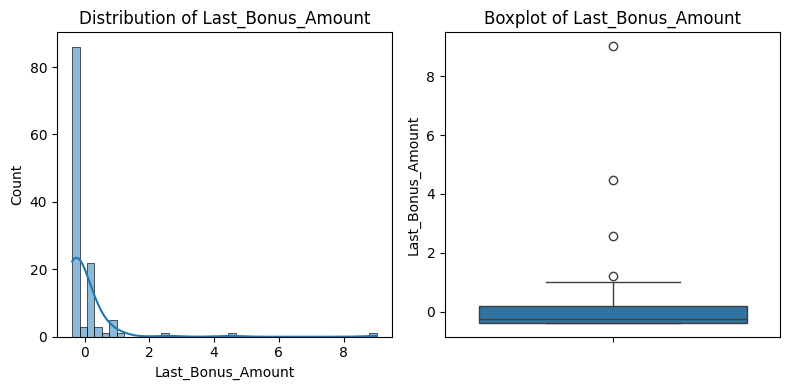

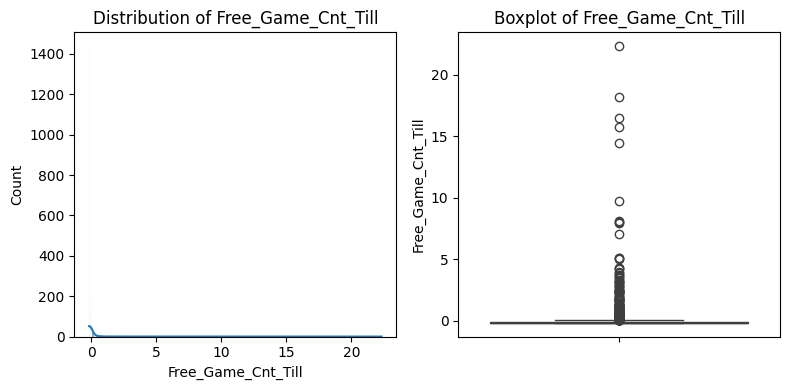

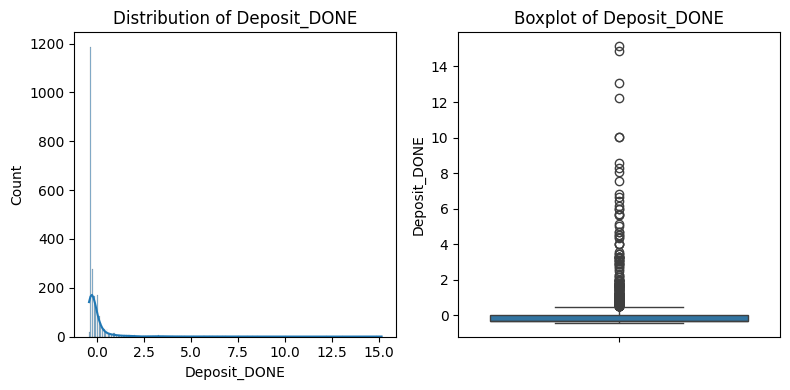

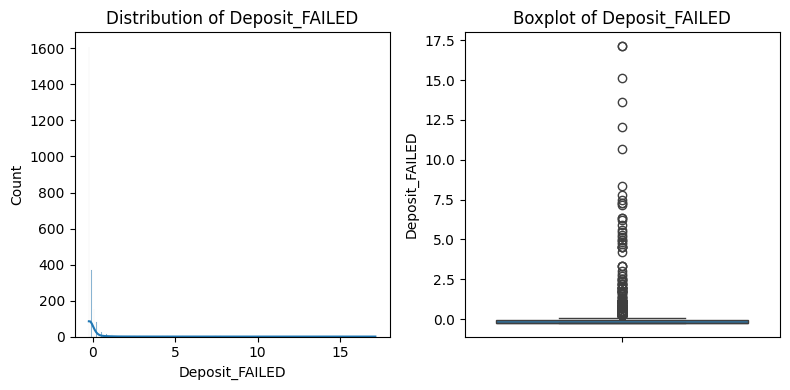

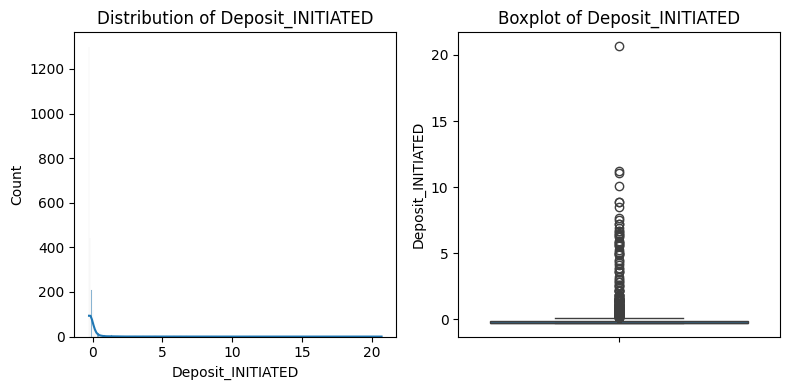

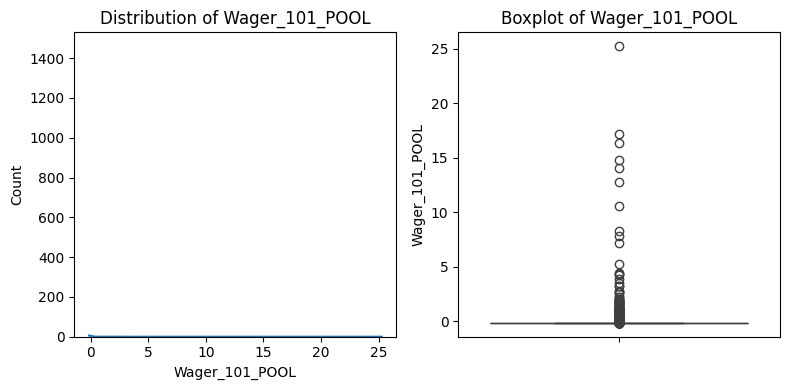

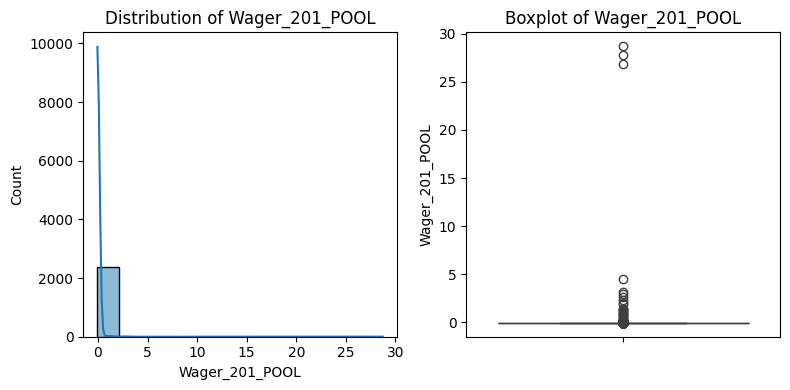

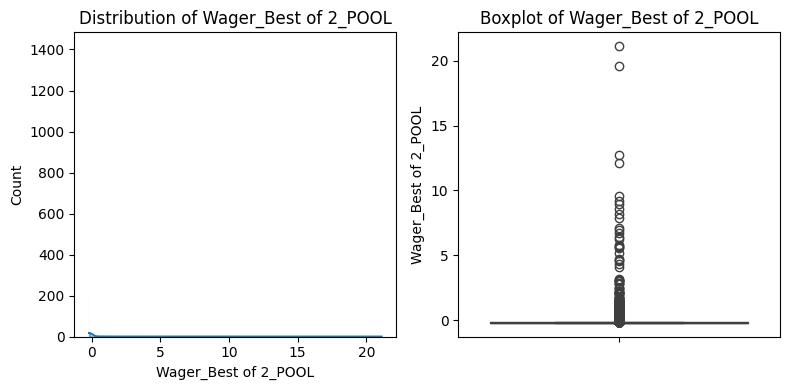

KeyboardInterrupt: 

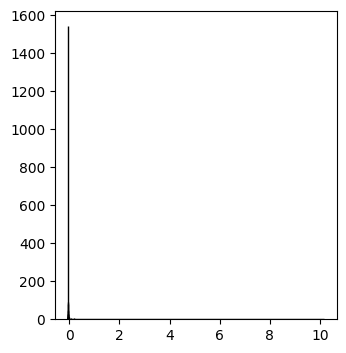

In [39]:
# Explore numerical features with histograms and boxplots
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

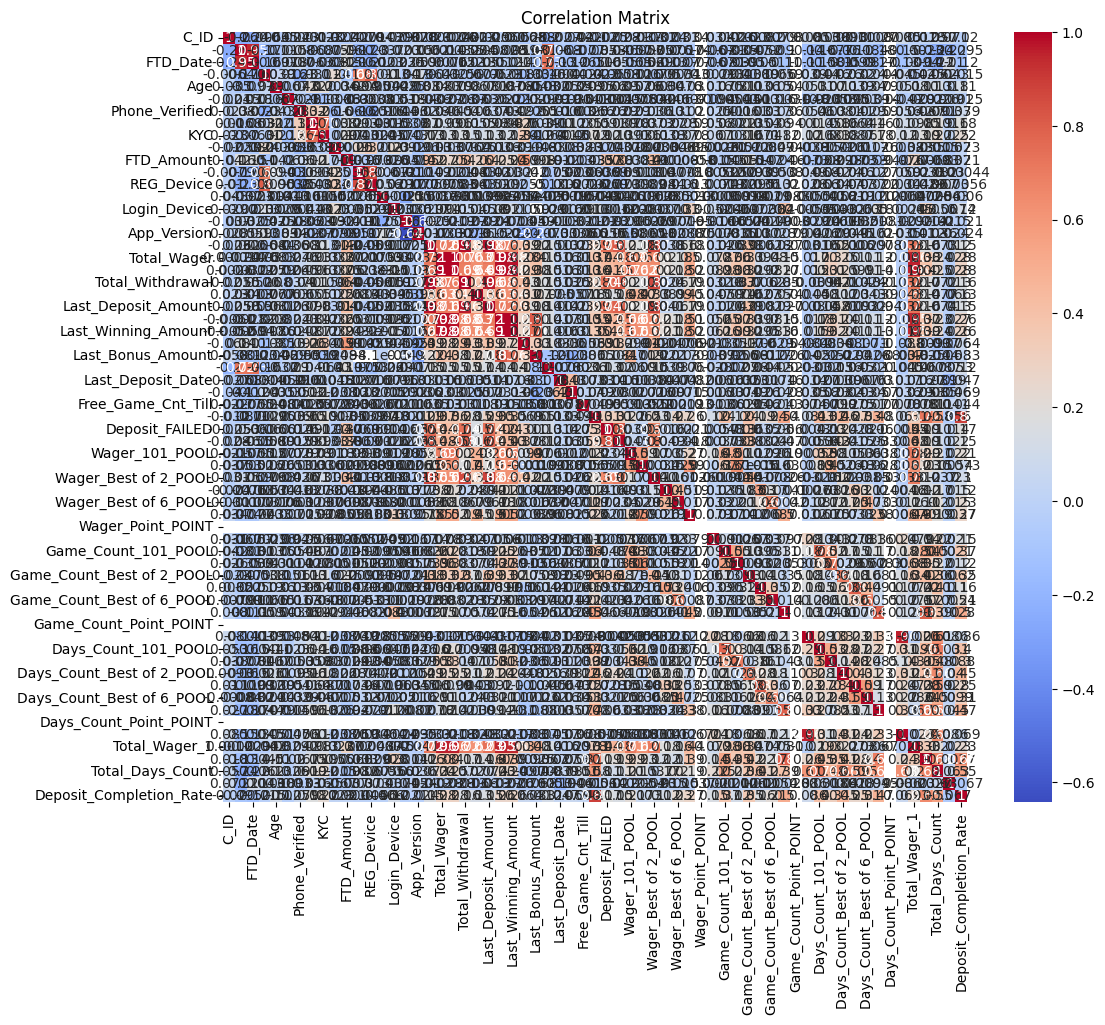

In [37]:
# prompt: EDA





# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for numerical features (if not too many)
# sns.pairplot(df.select_dtypes(include=np.number))
# plt.show()

In [40]:
df.head(10)

,C_ID,REG_Date,FTD_Date,Last_Login_Through,Age,Gender,Phone_Verified,Email_Verified,KYC,FTD_Device,...,Days_Count_Best of 3_POOL,Days_Count_Best of 6_POOL,Days_Count_Joker_POINT,Days_Count_Point_POINT,Days_Count_TOURNAMENT,Total_Wager_1,Total_Game_Count,Total_Days_Count,Days_Since_Registration,Deposit_Completion_Rate
0,0.693399,2021-11-01 01:36:30,2021-11-01 01:42:26,-0.547454,-0.608368,0.251163,0.215288,0.612607,-1.227381,-0.237083,...,-0.048135,0.227619,-0.412704,0.0,-0.071866,-0.207071,-0.276232,-0.421776,-0.360736,-0.398550
1,0.694847,2021-11-01 11:23:30,2021-11-01 11:26:49,-0.547454,0.224388,0.251163,0.215288,0.612607,0.807342,-0.237083,...,0.214251,1.174088,-0.412704,0.0,0.117533,-0.191788,0.009115,0.193830,-0.360736,0.018017
2,0.696295,2021-11-01 11:50:10,2021-11-05 12:35:06,-0.547454,0.640766,0.251163,0.215288,-1.632368,-1.227381,-0.237083,...,1.263796,0.227619,0.004357,0.0,0.117533,-0.163313,-0.184089,0.146476,0.135879,-0.444047
3,0.697742,2021-11-01 11:53:49,2021-11-03 09:41:14,-0.547454,-0.275265,0.251163,0.215288,0.612607,-1.227381,-0.237083,...,-0.310521,0.227619,-0.134663,0.0,-0.261265,-0.209329,-0.365402,-0.469130,-0.236582,-0.398550
4,0.699190,2021-11-01 13:44:04,2021-11-20 12:50:02,-0.547454,-0.191990,0.251163,0.215288,-1.632368,-1.227381,-0.237083,...,-0.310521,-0.245615,0.004357,0.0,0.117533,-0.206445,-0.157337,0.004413,1.874033,-0.157907
5,0.700637,2021-11-01 14:43:21,2021-11-01 15:00:52,-0.547454,0.390940,0.251163,0.215288,0.612607,0.807342,-0.237083,...,-0.310521,-0.245615,12.099126,0.0,-0.071866,0.689426,17.379563,3.792757,-0.360736,5.510000
6,0.702085,2021-11-01 15:07:40,2021-11-01 15:17:42,1.738858,-0.108714,0.251163,-4.644940,-1.632368,-1.227381,-0.237083,...,-0.310521,-0.245615,-0.412704,0.0,-0.261265,-0.209265,-0.359458,-0.563839,-0.360736,-0.444047
7,0.703533,2021-11-01 16:05:55,2021-11-20 15:41:44,1.738858,0.557491,0.251163,-4.644940,-1.632368,-1.227381,-0.237083,...,1.788568,0.227619,-0.412704,0.0,-0.261265,-0.208277,-0.291093,-0.042941,1.874033,-0.398550
8,0.704980,2021-11-01 18:04:03,2021-11-02 22:21:19,1.738858,0.807318,0.251163,0.215288,0.612607,0.807342,-0.237083,...,-0.310521,-0.245615,-0.134663,0.0,-0.071866,-0.209353,-0.359458,-0.421776,-0.236582,-0.444047
9,0.706428,2021-11-01 20:01:01,2021-11-01 22:27:41,-0.547454,0.390940,0.251163,0.215288,0.612607,0.807342,-0.237083,...,-0.310521,-0.245615,-0.273684,0.0,-0.261265,1.111847,-0.059250,-0.137650,-0.360736,-0.095956


from matplotlib import pyplot as plt
_df_0['C_ID'].plot(kind='hist', bins=20, title='C_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Last_Login_Through'].plot(kind='hist', bins=20, title='Last_Login_Through')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Phone_Verified'].plot(kind='hist', bins=20, title='Phone_Verified')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='C_ID', y='Last_Login_Through', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Last_Login_Through', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age', y='Phone_Verified', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Phone_Verified', y='Email_Verified', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['REG_Date']
  ys = series['Last_Login_Through']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('REG_Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('REG_Date')
_ = plt.ylabel('Last_Login_Through')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['REG_Date']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('REG_Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('REG_Date')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['REG_Date']
  ys = series['Phone_Verified']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('REG_Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('REG_Date')
_ = plt.ylabel('Phone_Verified')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['REG_Date']
  ys = series['Email_Verified']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('REG_Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('REG_Date')
_ = plt.ylabel('Email_Verified')

from matplotlib import pyplot as plt
_df_12['C_ID'].plot(kind='line', figsize=(8, 4), title='C_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Last_Login_Through'].plot(kind='line', figsize=(8, 4), title='Last_Login_Through')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Phone_Verified'].plot(kind='line', figsize=(8, 4), title='Phone_Verified')
plt.gca().spines[['top', 'right']].set_visible(False)

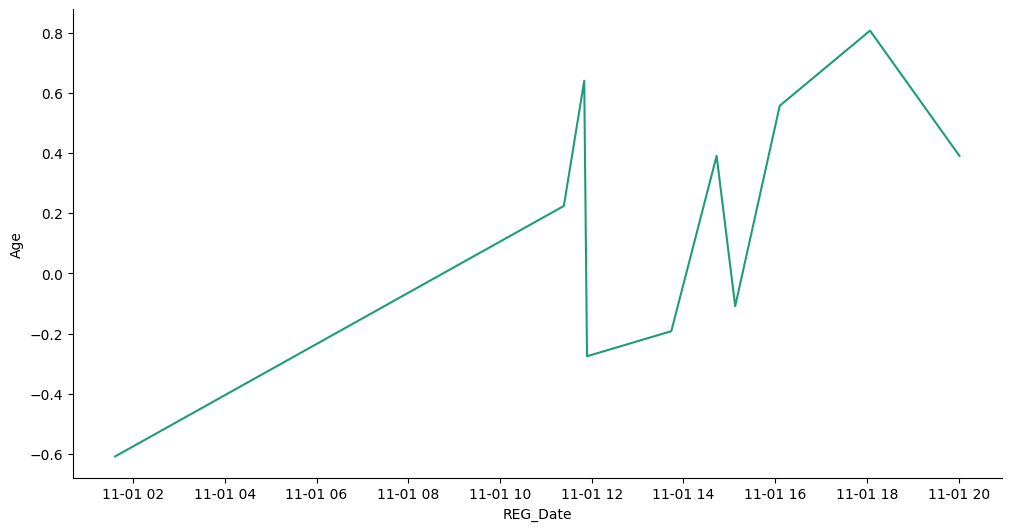

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['REG_Date']
  ys = series['Age']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('REG_Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('REG_Date')
_ = plt.ylabel('Age')

In [15]:
# Convert date columns
df['REG_Date'] = pd.to_datetime(df['REG_Date'])
df['FTD_Date'] = pd.to_datetime(df['FTD_Date'])
df['Days_Since_Registration'] = (df['FTD_Date'] - df['REG_Date']).dt.days

In [16]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [17]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [18]:
# Step 4: Feature Engineering
df['Deposit_Completion_Rate'] = df['Deposit_DONE'] / (df['Deposit_INITIATED'] + 1)

In [19]:
# Step 5: Modeling
X = df.drop(['C_ID', 'Total_Deposit'], axis=1)
y = (df['Total_Deposit'] > df['Total_Deposit'].median()).astype(int)

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Convert datetime columns to numerical features (e.g., using ordinal encoding)
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].astype('int64') // 10**9  # Convert to Unix timestamp
    X_test[col] = X_test[col].astype('int64') // 10**9

In [22]:
from sklearn.impute import SimpleImputer
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # You can use other strategies like 'median' or 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [23]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.99      0.99       212

    accuracy                           0.99       479
   macro avg       0.99      0.99      0.99       479
weighted avg       0.99      0.99      0.99       479



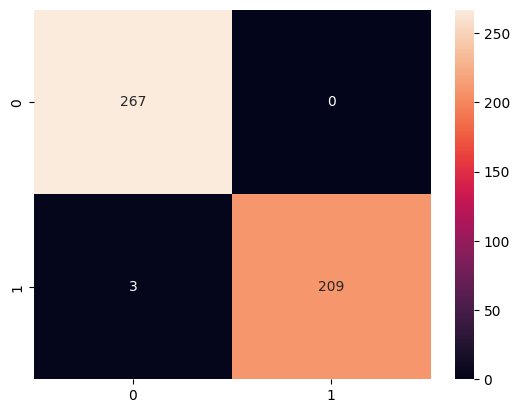

In [24]:
# Evaluation
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [25]:
from sklearn.metrics import classification_report, accuracy_score

In [26]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print classification report
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9937369519832986
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.99      0.99       212

    accuracy                           0.99       479
   macro avg       0.99      0.99      0.99       479
weighted avg       0.99      0.99      0.99       479



In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
# Step 8: Hyperparameter Tuning (Optional)
# Example of hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 150]})

In [29]:
# Best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(f'Best Accuracy (after tuning): {accuracy_score(y_test, y_pred_best)}')
print(classification_report(y_test, y_pred_best))

Best Accuracy (after tuning): 0.9937369519832986
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.99      0.99       212

    accuracy                           0.99       479
   macro avg       0.99      0.99      0.99       479
weighted avg       0.99      0.99      0.99       479



In [30]:
from sklearn.model_selection import StratifiedKFold

In [32]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.84      0.72       267
           1       0.66      0.40      0.50       212

    accuracy                           0.64       479
   macro avg       0.65      0.62      0.61       479
weighted avg       0.65      0.64      0.62       479



In [33]:
# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.84      0.72       267
           1       0.66      0.40      0.50       212

    accuracy                           0.64       479
   macro avg       0.65      0.62      0.61       479
weighted avg       0.65      0.64      0.62       479



In [34]:
# Ensure the model has been trained before scoring
model.fit(X_train, y_train)  # Fit the GradientBoostingClassifier

# Now you can calculate the training accuracy:
train_accuracy = model.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9937369519832986


In [35]:

# Method 2: Learning Curves (more robust)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [43]:
# prompt: save all models

import joblib

# Assuming 'model', 'lr_model', 'best_model' are your trained models
# Save the models
joblib.dump(model, 'gradient_boosting_model.pkl')
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(best_model, 'best_gradient_boosting_model.pkl')

print("Models saved successfully!")

Models saved successfully!
